In [1]:
import numpy as np

In [2]:
from pydbm.nn.neural_network import NeuralNetwork
from pydbm.nn.nn_layer import NNLayer as NNLayer1

In [3]:
from pydbm.activation.relu_function import ReLuFunction
from pydbm.activation.tanh_function import TanhFunction
from pydbm.activation.logistic_function import LogisticFunction
from pydbm.loss.mean_squared_error import MeanSquaredError
from pydbm.optimization.optparams.adam import Adam

In [4]:
from pydbm.synapse.nn_graph import NNGraph as NNGraph1

In [5]:
from pydbm.verification.verificate_function_approximation import VerificateFunctionApproximation

In [6]:
from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("pydbm")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

In [7]:
epochs = 75
batch_size = 20
dimension = 100
dimension2 = 500
scale = 0.01

In [8]:
nn_layer1 = NNLayer1(
    NNGraph1(
        activation_function=LogisticFunction(),
        hidden_neuron_count=dimension,
        output_neuron_count=dimension,
        scale=scale,
    )
)

opt_params = Adam()
opt_params.weight_limit = 0.5
opt_params.dropout_rate = 0.0

nn = NeuralNetwork(
    nn_layer_list=[
        nn_layer1, 
    ],
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=1e-05,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    computable_loss=MeanSquaredError(grad_clip_threshold=10.0),
    opt_params=opt_params,
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=1e-15
)


Setup NN layers and the parameters.


In [9]:
observed_arr = np.random.normal(loc=0.0, scale=1.0, size=(1000, dimension))
observed_arr = (observed_arr - observed_arr.min()) / (observed_arr.max() - observed_arr.min())

In [10]:
nn.learn(observed_arr=observed_arr, target_arr=observed_arr)

NN starts learning.
Best params are updated.
Epoch: 1
Loss: 
Training: 0.00011491847249955672 Test: 0.00010985208876029942
Epoch: 2
Loss: 
Training: 0.00012001245006806748 Test: 0.00011198487465349749
Epoch: 3
Loss: 
Training: 0.0001180569005911389 Test: 0.00011693972853211792
Epoch: 4
Loss: 
Training: 0.00012148580935176045 Test: 0.00011238400146197506
Best params are updated.
Epoch: 5
Loss: 
Training: 0.0001131836115768527 Test: 0.00011707063560398828
Best params are updated.
Epoch: 6
Loss: 
Training: 0.00010851677294025526 Test: 0.00011790443653792336
Best params are updated.
Epoch: 7
Loss: 
Training: 0.00010497721019053675 Test: 0.00011876102295103824
Epoch: 8
Loss: 
Training: 0.00010969869811719877 Test: 0.00011382797650973781
Best params are updated.
Epoch: 9
Loss: 
Training: 9.96859630578589e-05 Test: 0.00012168058117775763
Epoch: 10
Loss: 
Training: 0.00010296187031845694 Test: 0.00010621816651189278
Epoch: 11
Loss: 
Training: 0.00011366919145148555 Test: 0.0001074748939261735


Training: 9.105103306921782e-05 Test: 9.396930517894084e-05
Best params are updated.
Epoch: 52
Loss: 
Training: 7.854548833030942e-05 Test: 7.500664071849133e-05
Rolling mean of Loss (Window is 10): 
Training: 8.968531944773911e-05 Test: 9.252308534353254e-05
Epoch: 53
Loss: 
Training: 7.924472056264208e-05 Test: 7.196106076788484e-05
Rolling mean of Loss (Window is 10): 
Training: 8.825378879275557e-05 Test: 9.04258232189076e-05
Best params are updated.
Epoch: 54
Loss: 
Training: 7.236998157467206e-05 Test: 7.994381083583213e-05
Rolling mean of Loss (Window is 10): 
Training: 8.635121960175952e-05 Test: 8.769749433232834e-05
Epoch: 55
Loss: 
Training: 7.604879970154267e-05 Test: 7.946878681975009e-05
Rolling mean of Loss (Window is 10): 
Training: 8.41441463406366e-05 Test: 8.563627379008581e-05
Best params are updated.
Epoch: 56
Loss: 
Training: 7.201530585937784e-05 Test: 8.933525551145127e-05
Rolling mean of Loss (Window is 10): 
Training: 8.277348276713599e-05 Test: 8.419886708492

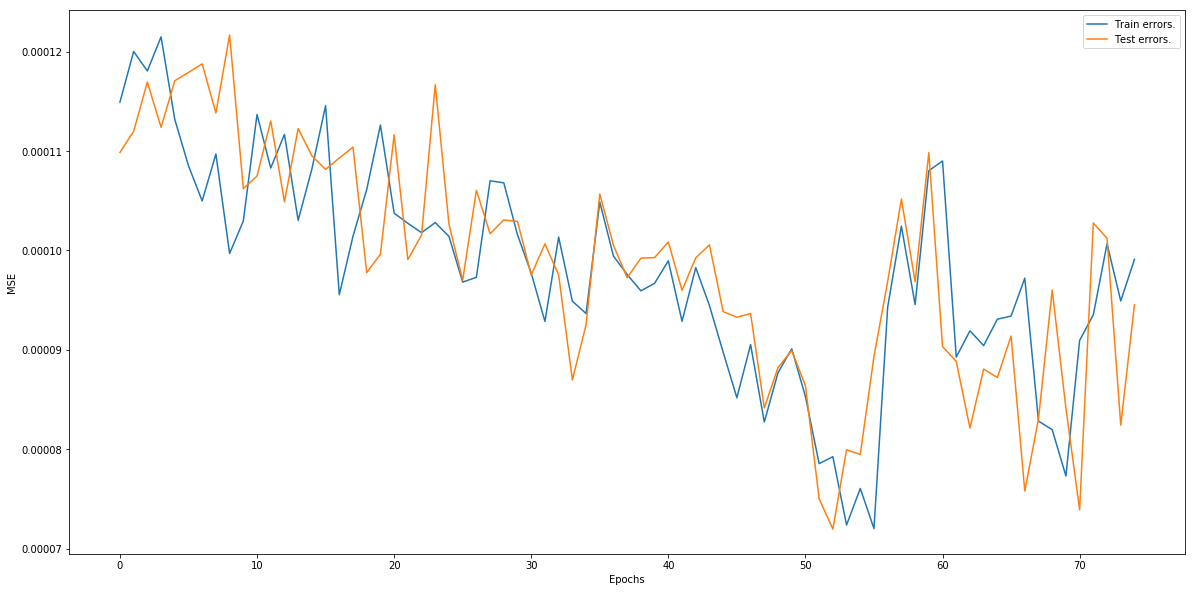

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
_ = plt.figure(figsize=(20, 10))
plt.plot(nn.verificatable_result.logs_df.train_loss.values, label="Train errors.")
plt.plot(nn.verificatable_result.logs_df.test_loss.values, label="Test errors.")
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Epochs")
plt.show()
plt.close()